In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path= ('/content/drive/MyDrive/Datasets/test.csv')
file_path_2= ('/content/drive/MyDrive/Datasets/train.csv')

dataset_test = pd.read_csv(file_path)
dataset_train = pd.read_csv(file_path_2)

dataset_test.head()
dataset_train.head()

Mounted at /content/drive


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [4]:
dataset_train.dtypes

,0
Id,int64
Elevation,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64


In [5]:
dataset_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
dataset_train.shape

(15120, 56)

In [7]:
dataset_train.Cover_Type.value_counts()

,count
Cover_Type,
5,2160
2,2160
1,2160
7,2160
3,2160
6,2160
4,2160


In [8]:
dataset_train.isnull().sum().sum()

0

In [9]:
duplicate_samples = dataset_train[dataset_train.duplicated(keep=False)]
print(duplicate_samples)

Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]


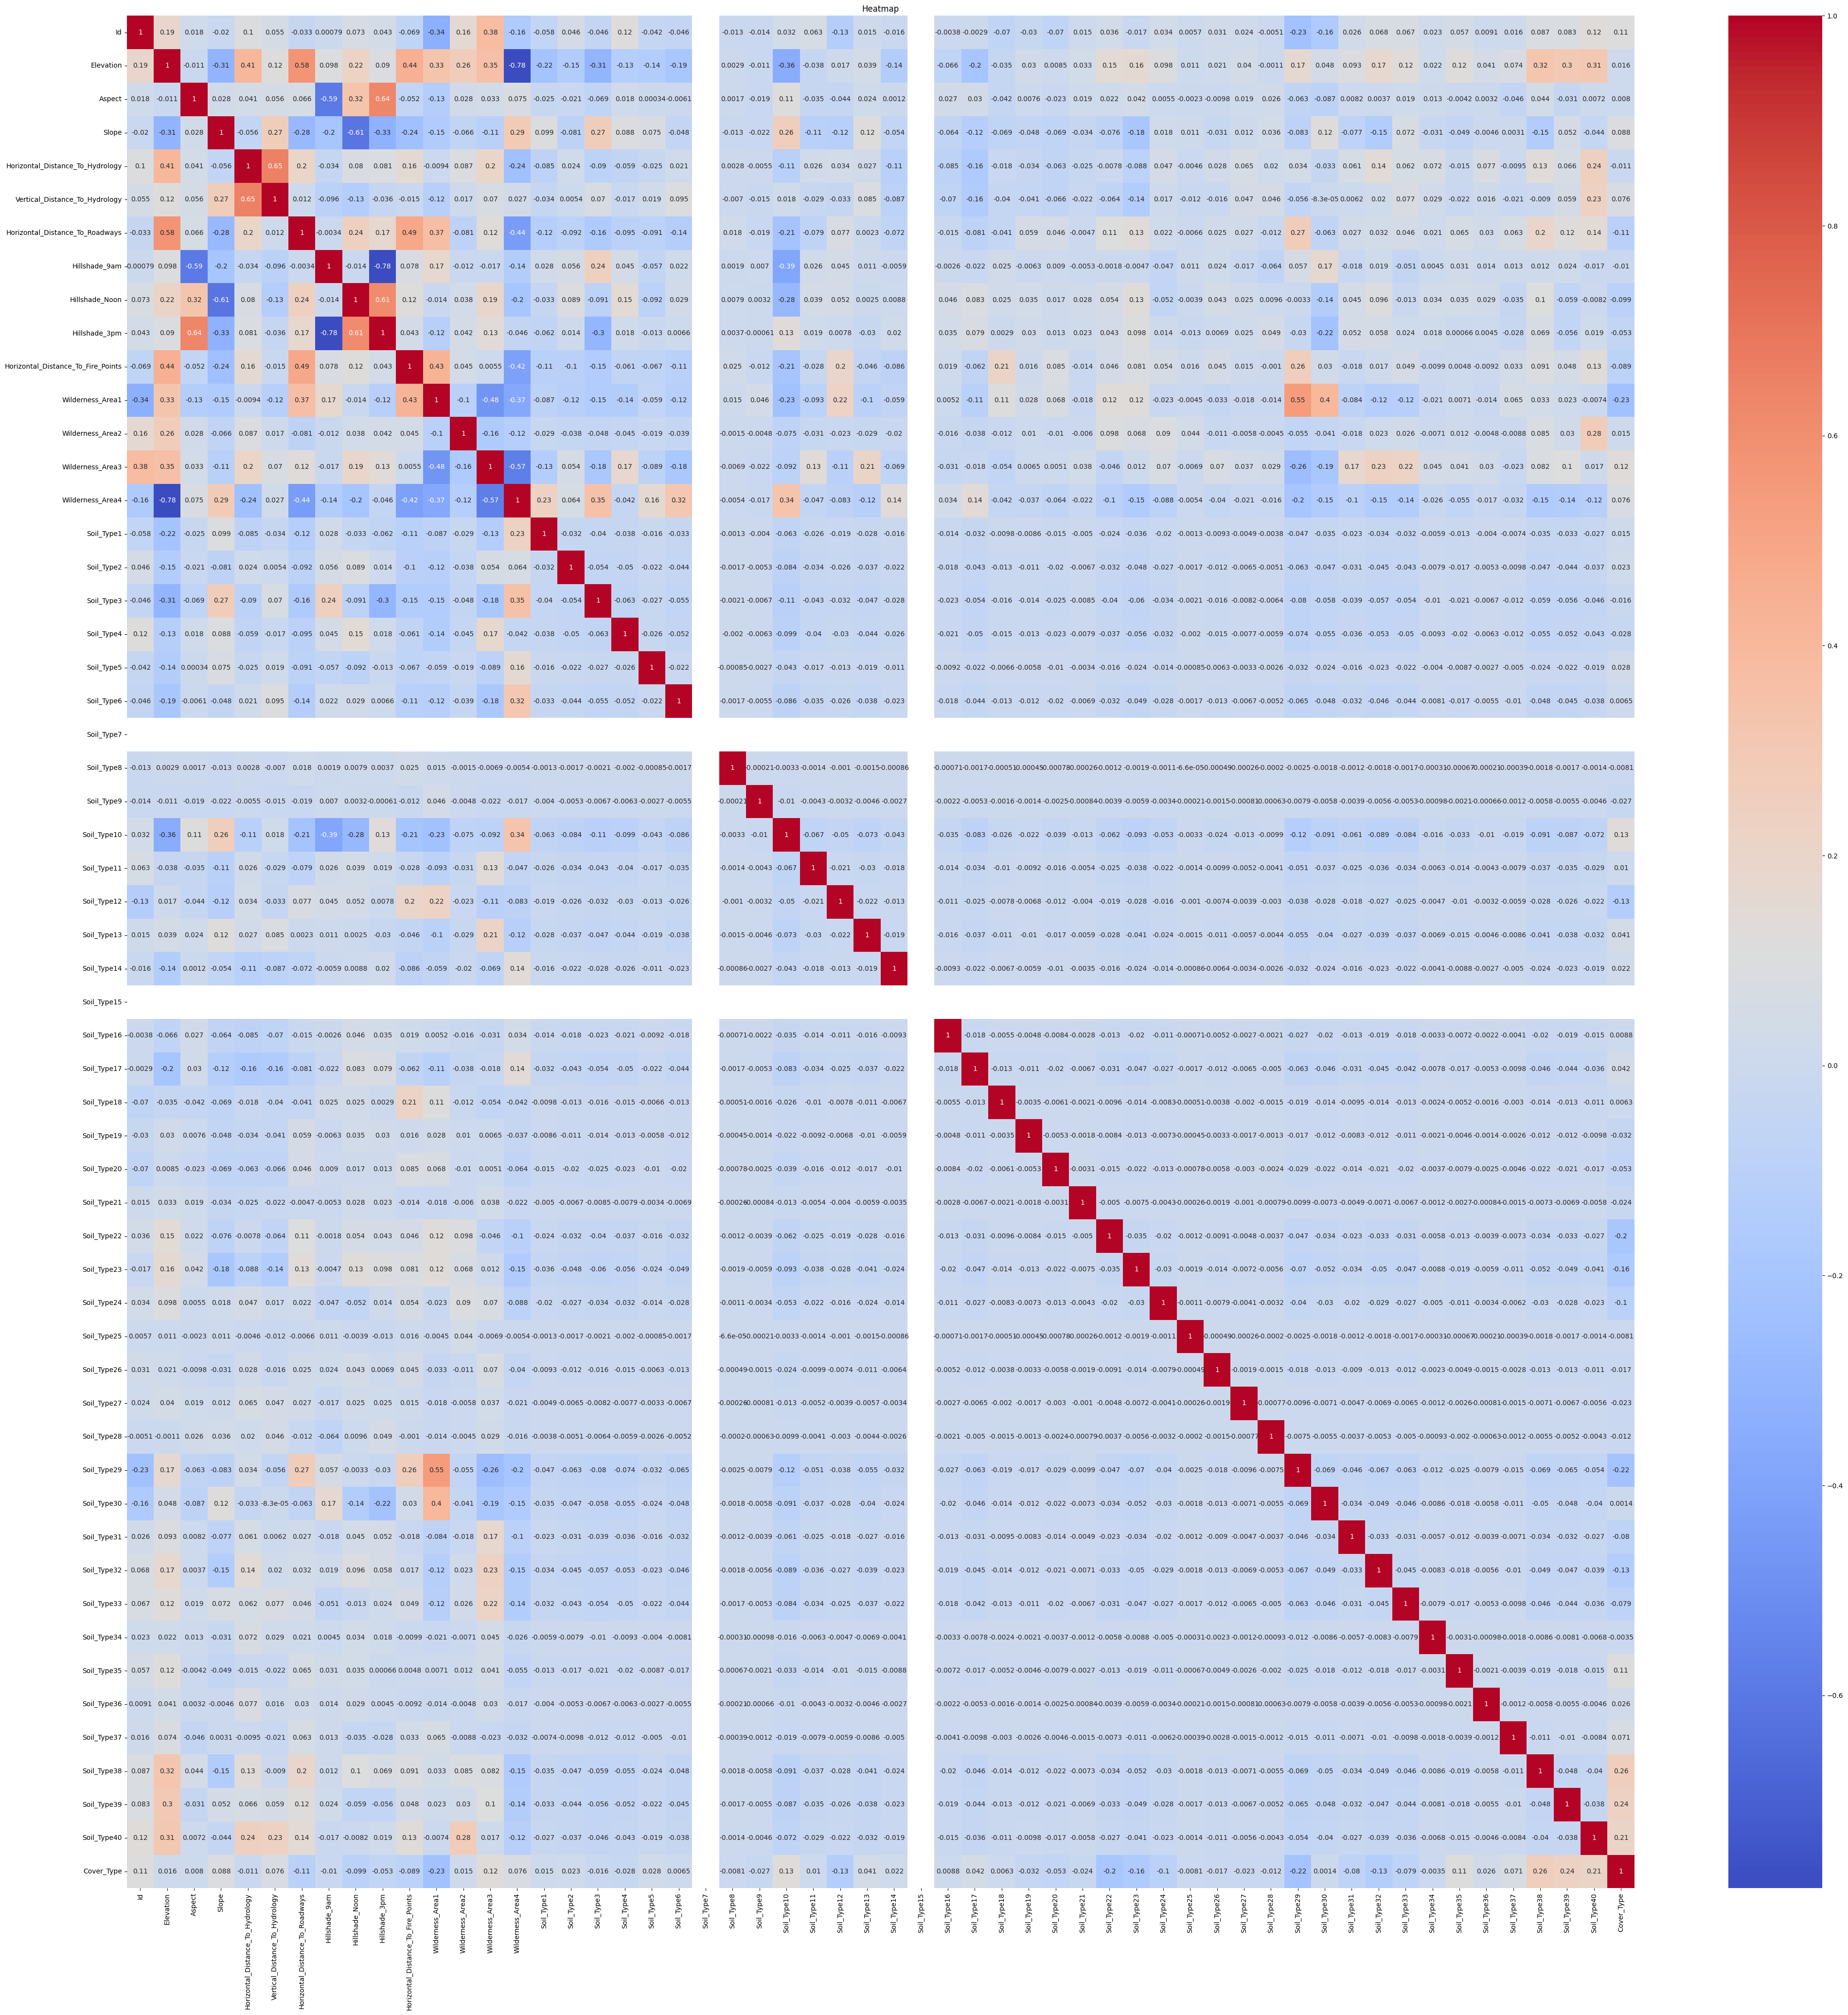

In [10]:
plt.figure(figsize=(50, 50))
corr = dataset_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Heatmap')
plt.show()

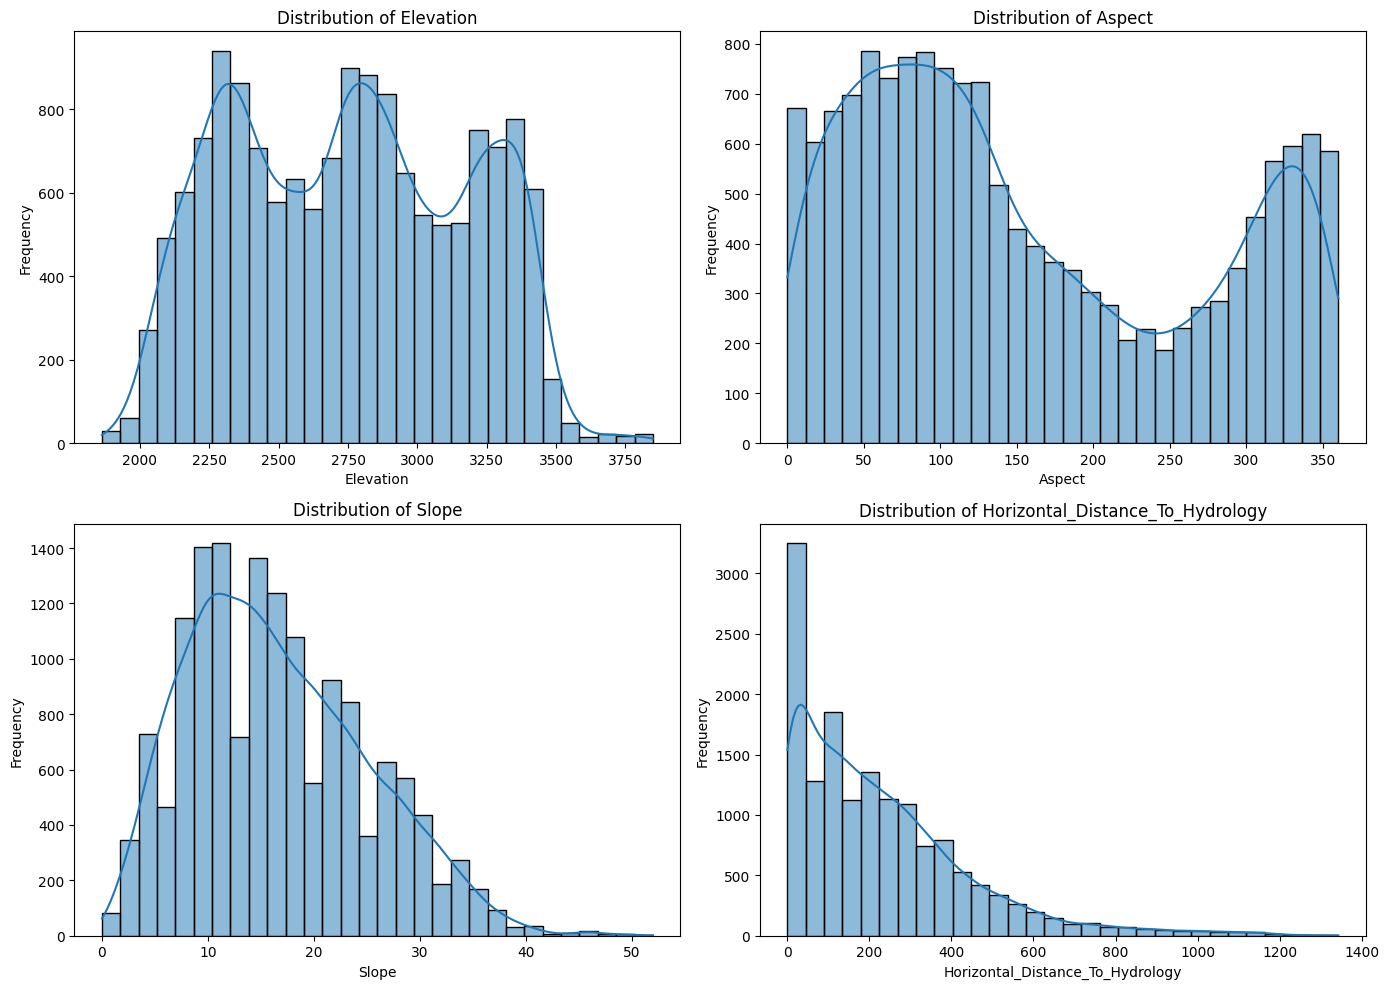

In [22]:
features_to_plot = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dataset_train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
le = LabelEncoder()
dataset_train['Cover_Type'] = le.fit_transform(dataset_train['Cover_Type'])

In [12]:
X = dataset_train.drop('Cover_Type', axis=1)
y = dataset_train['Cover_Type']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8753306878306878

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       421
           1       0.81      0.69      0.75       438
           2       0.87      0.84      0.85       428
           3       0.93      0.98      0.96       449
           4       0.90      0.95      0.92       416
           5       0.87      0.90      0.88       432
           6       0.95      0.97      0.96       440

    accuracy                           0.88      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.88      0.87      3024



In [16]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [17]:
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)
print("Best Parameters:", rf_random.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [18]:
best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8829365079365079

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       421
           1       0.82      0.71      0.77       438
           2       0.87      0.86      0.86       428
           3       0.95      0.98      0.96       449
           4       0.90      0.95      0.93       416
           5       0.87      0.90      0.89       432
           6       0.96      0.97      0.97       440

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



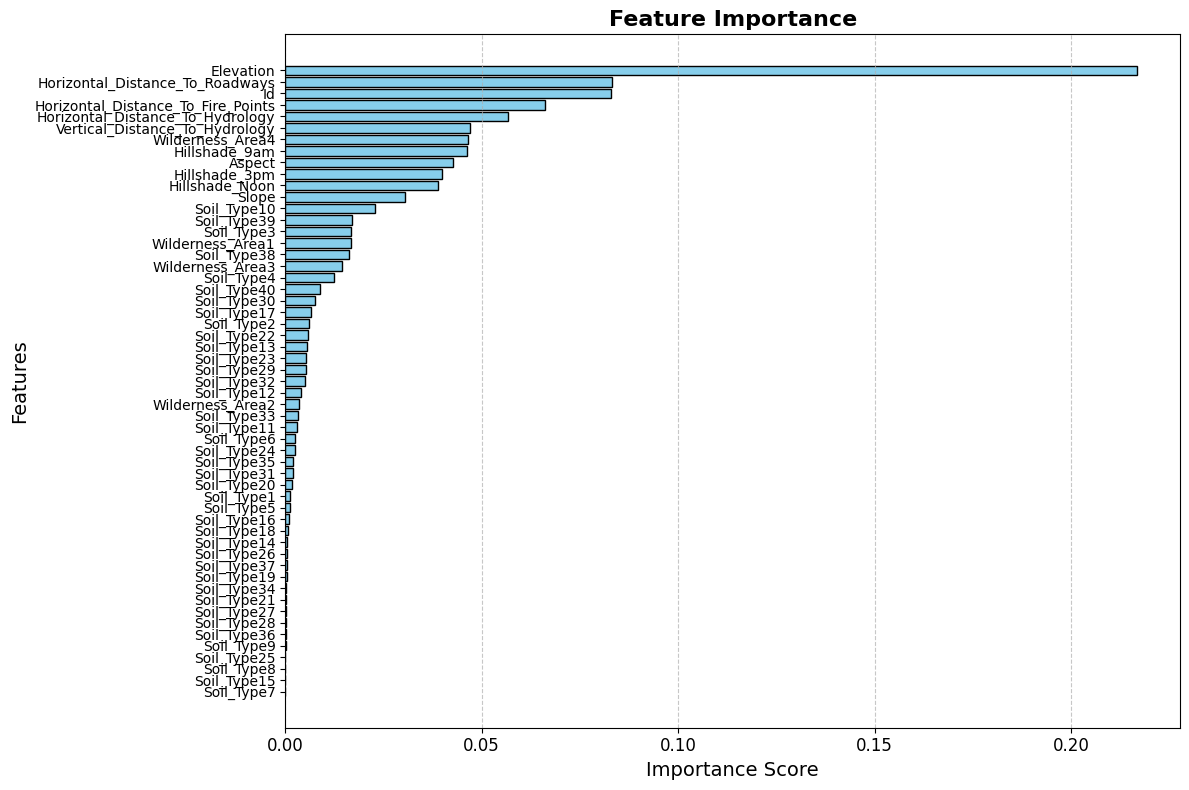

In [21]:
importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)
sorted_features = X_train.columns[sorted_indices]
sorted_importances = importances[sorted_indices]
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue', edgecolor='k')
plt.title("Feature Importance", fontsize=16, weight='bold')
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

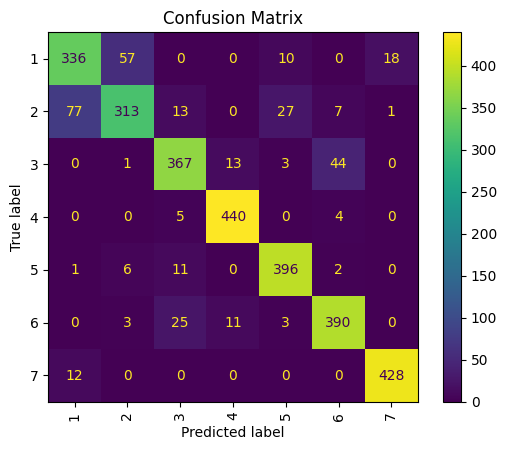

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

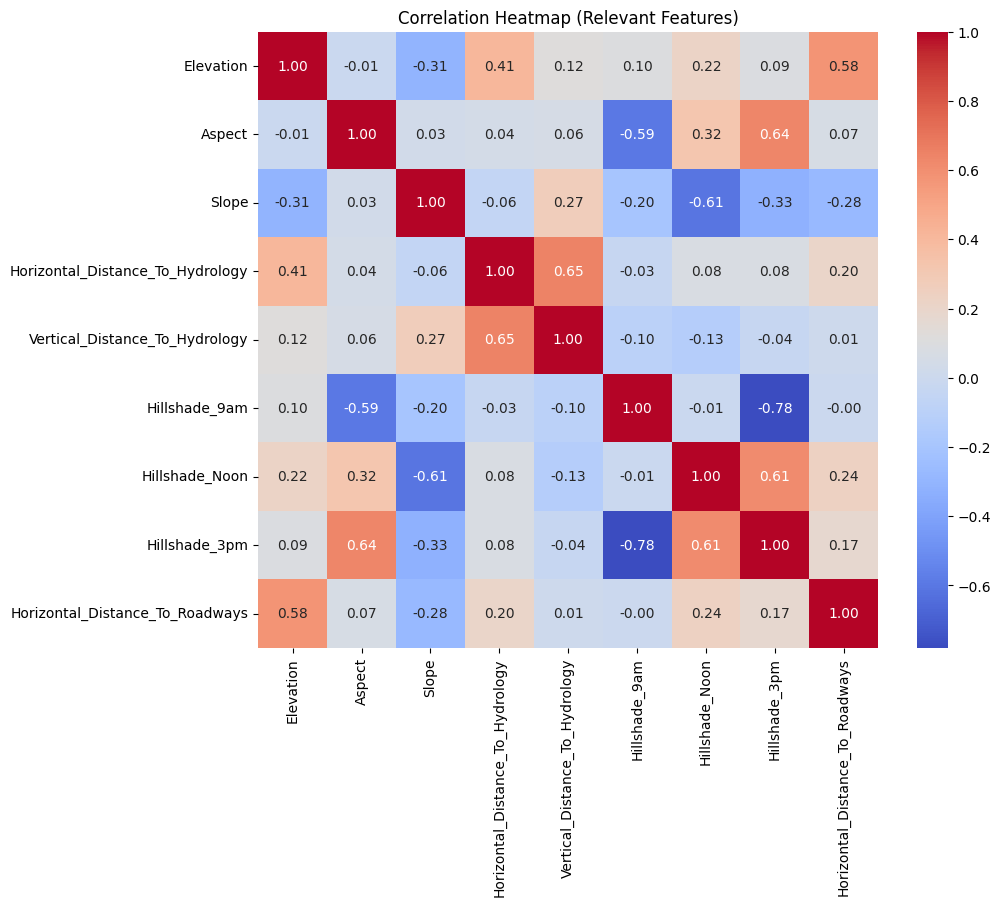

In [ ]:
relevant_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                     'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon',
                     'Hillshade_3pm', 'Horizontal_Distance_To_Roadways']
corr_subset = dataset_train[relevant_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Relevant Features)')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [8.56151341e-01 1.04611429e-01 3.21498941e-02 4.73544899e-03
 1.57299095e-03 5.95389083e-04 9.36644680e-05 6.19880978e-05
 2.59461530e-05 1.73105585e-06]
Total Variance Explained: 0.9999998226973105


In [ ]:
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
print("Accuracy (PCA):", accuracy_score(y_test, y_pred_pca))

Accuracy (PCA): 0.8445767195767195


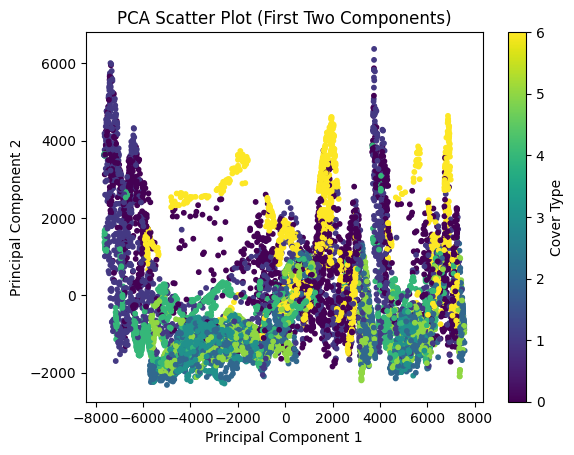

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=10)
plt.title("PCA Scatter Plot (First Two Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cover Type')
plt.show()